# Zhaoliang Zheng's Homework of Week 2（version 1）

In this notebook, I used only word2vec method

In [1]:
import os
ROOTDIR = os.path.abspath(os.path.dirname('__file__'))
DATADIR = os.path.join(ROOTDIR, 'data')

In [2]:
print(ROOTDIR)
print(DATADIR)

C:\Users\zzl
C:\Users\zzl\data


In [3]:
import pandas as pd
#Load movie reviews dataset
df = pd.read_csv(os.path.join(DATADIR, 'fake_or_real_news.csv'))
df.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


*** Preprocessing 

In [4]:
#in this step, I'm gonna drop the first column which is meaningless here
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,title,text,label,title_vectors
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,[ 0.04833125 0.01000964 0.09758892 0.089780...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,[ 0.01861144 0.00860776 0.01915705 0.074776...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,[-2.33481918e-02 2.35741232e-02 3.15252207e-...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,[ 5.14873676e-02 7.35515803e-02 3.77446413e-...
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL,[ 0.0595002 0.06272358 -0.04209072 0.104249...


In [5]:
#in this step, I'm gonna binrize the label
def binarize(word):
    if word== 'REAL':
        return 0
    else:
        return 1
df.label= df.label.apply(binarize)

In [6]:
df.tail()

,title,text,label,title_vectors
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,[ 0.04833125 0.01000964 0.09758892 0.089780...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,[ 0.01861144 0.00860776 0.01915705 0.074776...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,[-2.33481918e-02 2.35741232e-02 3.15252207e-...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,[ 5.14873676e-02 7.35515803e-02 3.77446413e-...
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,0,[ 0.0595002 0.06272358 -0.04209072 0.104249...


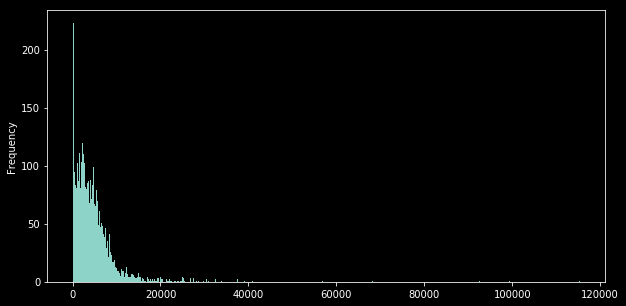

In [7]:
import matplotlib
%matplotlib inline
matplotlib.pyplot.style.use('dark_background')
df['text'].str.len().plot(kind='hist', bins=1000, figsize=(10,5))

In [8]:
import nltk
from nltk.corpus import gutenberg
from gensim import models

D:\program files(X86)\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
from string import punctuation
texts = df.text
mapping_table = {ord(char): u' ' for char in punctuation}
tokenized = [nltk.word_tokenize(review.translate(mapping_table)) for review in texts]

In [10]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [11]:
from nltk.corpus import stopwords

def clean_text(tokenized_list, sw):
    new_list = []
    for doc in tokenized_list:
        new_list.append([token.lower() for token in doc if token.lower() not in sw])
    return new_list

# Remove punctuations and stopwords, and lower-case text

cleaned = clean_text(tokenized, sw)

In [12]:
a = 1
print('Example text:\n   {} \n\n Cleaned text: {}'.format(texts[a], [i for i in cleaned[a]]))

Example text:
   Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr 
There are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. 
In a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : “Republicans, it is time to

In [13]:
from collections import Counter

token_counter = Counter(token.lower() for sentence in cleaned for token in sentence)
top10 = token_counter.most_common()[:10]
for i, t in enumerate(top10):
    print('{:>2}.{:>11}  freq: {:>7}'.format(i+1, t[0], t[1]))

 1.          ’  freq:   58461
 2.          “  freq:   34978
 3.          ”  freq:   34368
 4.      trump  freq:   22383
 5.       said  freq:   21200
 6.    clinton  freq:   17461
 7.      would  freq:   12765
 8.        one  freq:   11842
 9.     people  freq:   11712
10.        new  freq:    9327


 *** Word2Vec model

In [30]:
from gensim import models
#Word2Vec
wvtext = models.Word2Vec(
                       cleaned,
                       size = 100,
                       window = 5,
                       min_count = 1,
                       sg = 1, alpha = 0.05, iter=10, batch_words = 10000)
                       #seed = 10)

In [31]:
wvtext.wv.most_similar(positive='trump')

[('donald', 0.9029369950294495),
 ('televangelistical', 0.748514711856842),
 ('winning—but', 0.7426244020462036),
 ('pus', 0.7370606064796448),
 ('prowled', 0.7355399131774902),
 ('loyally', 0.7354214191436768),
 ('buttresses', 0.7336909770965576),
 ('navin', 0.733575701713562),
 ('lamely', 0.7291327714920044),
 ('catalyzed', 0.7241857051849365)]

***Array transition

In [32]:
from numpy import *
import numpy as np

text_vec = np.zeros((len(df), 100))
for i in range(0, len(df)):
    text_vec[i] = 0
    length = len(cleaned[i])
    for word in cleaned[i]:
        text_vec[i] += wvtext[word]
    if length != 0:
        text_vec[i] = text_vec[i]/length #Mean vector value for each text
text_vec.shape

D:\program files(X86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


(6335, 100)

In [20]:
import numpy as np

x = np.insert(text_vec, 0, 1, axis=1)
y = np.asarray(df['label'])

x_norm = (x - x.mean(axis=0)) / (x.max(axis=0) - x.min(axis=0)) # normed by col
x_norm = np.insert(x_norm, 0, 1, axis=1)
y = np.asarray(df['label'])

print(x_norm)

[[ 1.                 nan  0.12839226 ...  0.14068448  0.10940709
   0.01807798]
 [ 1.                 nan  0.01769861 ... -0.00520145  0.04788543
   0.14972154]
 [ 1.                 nan -0.0846194  ... -0.07081158  0.00940644
  -0.11450357]
 ...
 [ 1.                 nan  0.10489006 ... -0.046933    0.00218958
  -0.02556713]
 [ 1.                 nan -0.05852805 ... -0.07033556 -0.06989169
  -0.10839129]
 [ 1.                 nan -0.02613417 ...  0.0307676   0.09632357
   0.09138987]]


D:\program files(X86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [44]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
seed = 50
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

*** METHOD 1: LogisticRegression

In [52]:
%%time
# instantiate a logistic regression model, and fit with X and y
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# check the accuracy on the training set
model.score(x_test, y_test)

Wall time: 633 ms


In [46]:
from sklearn.metrics import classification_report
target_names = ['fake', 'real']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

       fake       0.93      0.92      0.92       321
       real       0.92      0.93      0.92       313

avg / total       0.92      0.92      0.92       634



*** METHOD 2: XGBoots

In [50]:
%%time
from xgboost import XGBClassifier

XGmodel = XGBClassifier(max_depth=8, learning_rate=0.8, 
                        n_estimators=1000, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=0.9, 
                        base_score=0.6, seed=32, missing=None)

XGmodel.fit(x_train, y_train)

Wall time: 39.1 s


In [51]:
%%time
y_pred = XGmodel.predict(x_test)

target_names = ['fake', 'real']

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

       fake       0.93      0.89      0.91       321
       real       0.90      0.93      0.91       313

avg / total       0.91      0.91      0.91       634

Wall time: 38.1 ms


D:\program files(X86)\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
